### Importing Libraries

In [165]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#### Read Dataset

In [166]:
df_train = pd.read_csv("data/train-data.csv")
df_test = pd.read_csv("data/test-data.csv")

In [167]:
print(df_train.shape, df_test.shape)

(6019, 14) (1234, 13)


In [168]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [169]:
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [170]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
Unnamed: 0           1234 non-null int64
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [171]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


#### Analyzing Data

In [172]:
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


##### New_Price have more than 86% data as missing
##### Rest of the columns can be filled using mean or median or mode as per convenience.

In [173]:
miss_percent = (df_test.isnull().sum() / len(df_test)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_test.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,85.251216,1052
Seats,0.891410,11
Engine,0.810373,10
Power,0.810373,10


##### Dropping 'Unnamed' Column

In [174]:
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)

#### Creating new Column for Brand Type

In [175]:
df_train['Brand_Name'] = df_train['Name'].apply(lambda x: x.split(" ")[0])


In [176]:
df_test['Brand_Name'] = df_test['Name'].apply(lambda x: x.split(" ")[0])

In [177]:
df_train.drop(columns=["Name"], axis=1, inplace=True)
df_test.drop(columns=["Name"], axis=1, inplace=True)

In [178]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
Brand_Name           1234 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


##### Replacing all missing values in seats with mode of the specified brand name

In [179]:
def fill_na_with_mode(ds, brandname):
  fill_value = ds.loc[ds['Brand_Name'] == brandname]['Seats'].mode()[0]
  condit = ((ds['Brand_Name'] == brandname) & (ds['Seats'].isnull()))
  ds.loc[condit, 'Seats'] = ds.loc[condit, 'Seats'].fillna(fill_value)

In [180]:
car_brand = ['Maruti','Hyundai','BMW','Fiat','Land','Ford','Toyota','Honda','Skoda','Mahindra']
for c in car_brand:
    fill_na_with_mode(df_train, c)
    fill_na_with_mode(df_test, c)

##### Converting Mileage, Engine & Power to proper Dtype

In [181]:
import re

df_train['Mileage_upd'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Engine_upd'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Power_upd'] = df_train['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

df_test['Mileage_upd'] = df_test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_test['Engine_upd'] = df_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_test['Power_upd'] = df_test['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

In [182]:
df_train['Mileage_upd'] = pd.to_numeric(df_train['Mileage_upd'], errors='coerce')
df_train['Engine_upd'] = pd.to_numeric(df_train['Engine_upd'], errors='coerce')
df_train['Power_upd'] = pd.to_numeric(df_train['Power_upd'], errors='coerce')

df_test['Mileage_upd'] = pd.to_numeric(df_test['Mileage_upd'], errors='coerce')
df_test['Engine_upd'] = pd.to_numeric(df_test['Engine_upd'], errors='coerce')
df_test['Power_upd'] = pd.to_numeric(df_test['Power_upd'], errors='coerce')

In [183]:
df_train.drop(columns=['Mileage', 'Engine', 'Power'], inplace=True)
df_test.drop(columns=['Mileage', 'Engine', 'Power'], inplace=True)

In [184]:
df_train.drop(df_train[df_train['Brand_Name'] == 'Smart'].index, axis=0, inplace=True)
df_test.drop(df_test[df_test['Brand_Name'] == 'Hindustan'].index, axis=0, inplace=True)

##### Replacing all na values with mode of that specific brand

In [187]:
def fill_na_with_mode(ds, brandname, colname):
  fill_value = ds.loc[ds['Brand_Name'] == brandname][colname].mode()[0]
  condit = ((ds['Brand_Name'] == brandname) & (ds[colname].isnull()))
  ds.loc[condit, colname] = ds.loc[condit, colname].fillna(fill_value)

In [188]:
miss_Mileage_col = df_train.loc[df_train['Mileage_upd'].isnull()]['Brand_Name'].unique()
miss_Engine_col = df_train.loc[df_train['Engine_upd'].isnull()]['Brand_Name'].unique()
miss_Power_col = df_train.loc[df_train['Power_upd'].isnull()]['Brand_Name'].unique()

for x in miss_Mileage_col:
  fill_na_with_mode(df_train, x, 'Mileage_upd')
for y in miss_Engine_col:
  fill_na_with_mode(df_train, y, 'Engine_upd')
for z in miss_Power_col:
  fill_na_with_mode(df_train, z, 'Power_upd')

In [189]:
miss_ts_Mileage_col = df_test.loc[df_test['Mileage_upd'].isnull()]['Brand_Name'].unique()
miss_ts_Engine_col = df_test.loc[df_test['Engine_upd'].isnull()]['Brand_Name'].unique()
miss_ts_Power_col = df_test.loc[df_test['Power_upd'].isnull()]['Brand_Name'].unique()

for x in miss_ts_Mileage_col:
  fill_na_with_mode(df_test, x, 'Mileage_upd')
for y in miss_ts_Engine_col:
  fill_na_with_mode(df_test, y, 'Engine_upd')
for z in miss_ts_Power_col:
  fill_na_with_mode(df_test, z, 'Power_upd')

In [191]:
zero_mileage_col = df_train.loc[df_train['Mileage_upd'] == 0.0]['Brand_Name'].unique()

for m in zero_mileage_col:
  fill_zero = df_train.loc[df_train['Brand_Name'] == m]['Mileage_upd'].mode()[0]
  m1 = ((df_train['Brand_Name'] == m) & (df_train['Mileage_upd'] == 0.0))
  df_train.loc[m1, 'Mileage_upd'] = fill_zero

In [193]:
zero_mileage_col2 = df_test.loc[df_test['Mileage_upd'] == 0.0]['Brand_Name'].unique()

for m in zero_mileage_col2:
  fill_zero = df_test.loc[df_test['Brand_Name'] == m]['Mileage_upd'].mode()[0]
  m1 = ((df_test['Brand_Name'] == m) & (df_test['Mileage_upd'] == 0.0))
  df_test.loc[m1, 'Mileage_upd'] = fill_zero

In [194]:
m1 = (df_train['Seats'] == 0.0)
df_train.loc[m1, 'Seats'] = 5.0

##### Plotting the data

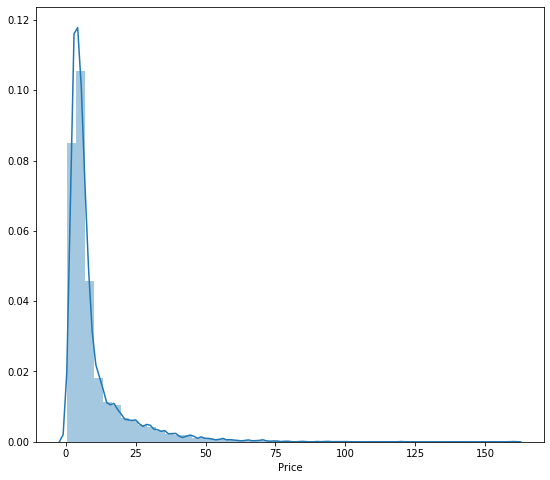

In [195]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_train['Price'])
plt.show()

As the price column is sqewed to the right so label is not properly distributed

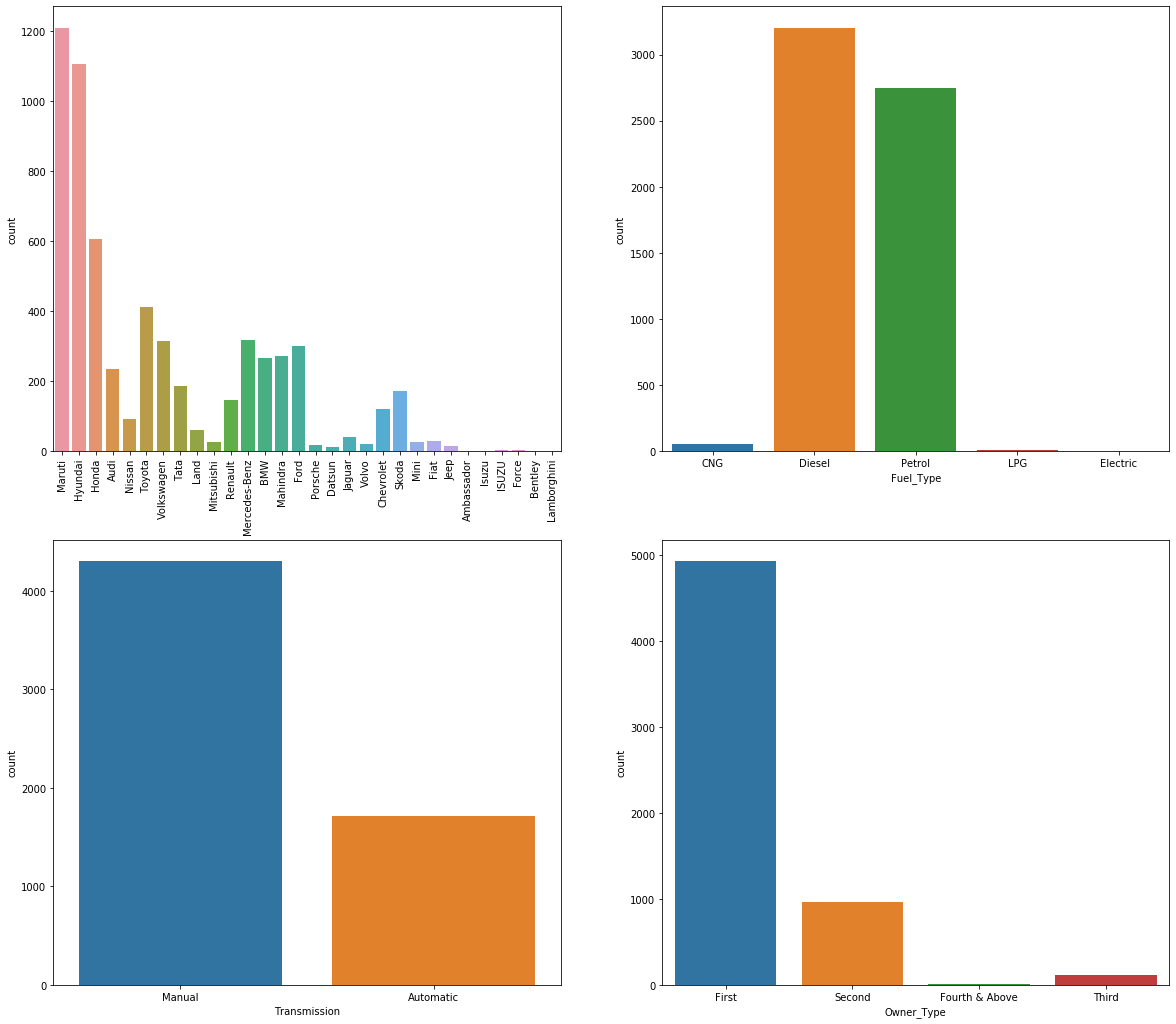

In [199]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Brand_Name', data=df_train)
loc, labels = plt.xticks()
g1.set_xticklabels(labels, rotation=90)
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=df_train)
loc, labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Transmission', data=df_train)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=df_train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()